# Лабораторная работа №1

## Лепигина Анастасия

Задача определения качества опухоли груди по различным медицинским показателям.<br>
Значения каждого показателя варьируются от 1 до 10.<br>
Значения классов: 2 -- доброкачественная опухоль, 4 -- злокачественная опухоль


Импортируем необходимые модули.

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Загружаем данные

In [262]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
data = pd.read_csv(url, header=None, sep = ',', engine='python')

In [263]:
data.columns = [u'Id', u'Clump Thickness', u'Uniformity of Cell Size', u'Uniformity of Cell Shape', u'Marginal Adhesion',
       u'Single Epithelial Cell Size', u'Bare Nuclei', u'Bland Chromatin', u'Normal Nucleoli', u'Mitoses',
       u'Class']

In [264]:
type(data)

pandas.core.frame.DataFrame

In [265]:
data.head()

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [266]:
data.tail()

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [267]:
print(data.shape)
print(data.columns)

(699, 11)
Index(['Id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [268]:
data.index

RangeIndex(start=0, stop=699, step=1)

# Подготовка датасета

В столбце Bare Nuclei присутствуют '?', которые должны быть заменены на 'NaN'.

In [269]:
data['Bare Nuclei'] = [None if i == '?' else i for i in data['Bare Nuclei'] ]

Удаляем столбец с Id

In [270]:
data = data.drop([u'Id'], axis=1)

Было обнаружено, что тип данных содержимого столбца Bare Nuclei -- object, соответственно, все значения должны быть переведены в integer для последующей корректной обработки.

In [271]:
data.describe(include = ['object'])

,Bare Nuclei
count,683
unique,10
top,1
freq,402


In [272]:
data['Bare Nuclei'] = [int(i) if i != None else None for i in data['Bare Nuclei']]

Обрабатываем пропущенные значения путем заполнения их медианным значением

In [273]:
data.median(axis = 0)

Clump Thickness                4.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    1.0
Bland Chromatin                3.0
Normal Nucleoli                1.0
Mitoses                        1.0
Class                          2.0
dtype: float64

In [274]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [275]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [276]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Из таблицы следует, что классы в наборе данных представлены неравномерно: доброкачественных опухолей больше.

/Users/stacey/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


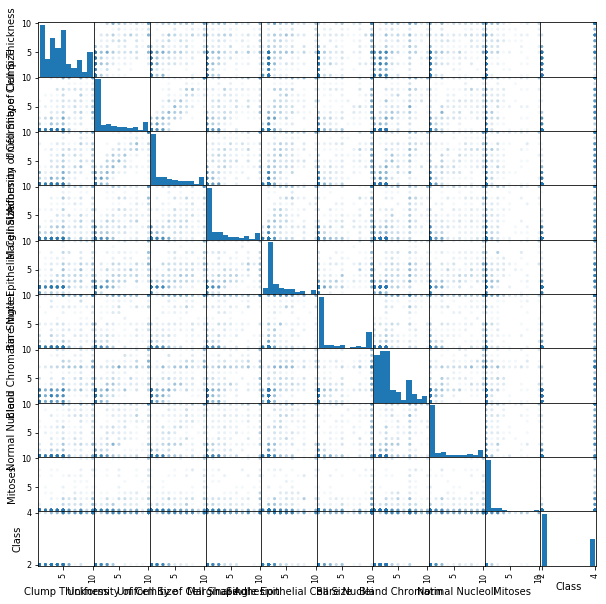

In [277]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

Можно заключить, что существует корреляция между величиной значений всех признаков и классами. Чем меньше значения атрибутов -- тем больше вероятность, что опухоль доброкачественная; чем больше значения атрибутов -- тем больше вероятность, что опухоль злокачественная.

In [278]:
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


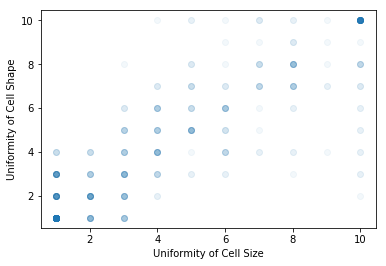

In [279]:
plt.plot(data['Uniformity of Cell Size'], data['Uniformity of Cell Shape'], 'o', alpha = 0.05)
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')
pass

In [280]:
data['Class'] == 2

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11      True
12     False
13      True
14     False
15     False
16      True
17      True
18     False
19      True
20     False
21     False
22      True
23     False
24      True
25     False
26      True
27      True
28      True
29      True
       ...  
669    False
670    False
671     True
672     True
673     True
674     True
675     True
676     True
677     True
678     True
679     True
680    False
681    False
682     True
683     True
684     True
685     True
686     True
687     True
688     True
689     True
690     True
691    False
692     True
693     True
694     True
695     True
696    False
697    False
698    False
Name: Class, Length: 699, dtype: bool

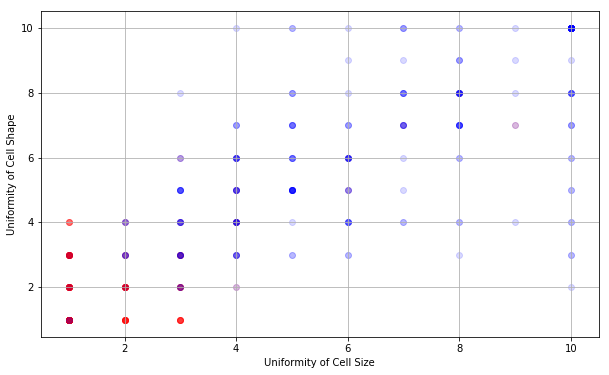

In [281]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Class'] == 2]['Uniformity of Cell Size'],
            data[data['Class'] == 2]['Uniformity of Cell Shape'],
            alpha = 0.15,
            label = 2,
            color = 'r')

plt.scatter(data[data['Class'] == 4]['Uniformity of Cell Size'],
            data[data['Class'] == 4]['Uniformity of Cell Shape'],
            alpha = 0.15,
            label = 4,
            color = 'b')

plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')
plt.grid()

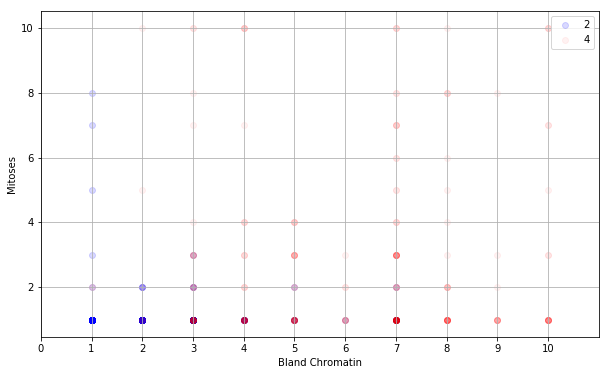

In [282]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Class'] == 2]['Bland Chromatin'],
            data[data['Class'] == 2]['Mitoses'],
            alpha = 0.15,
            label = 2,
            color = 'b')

plt.scatter(data[data['Class'] == 4]['Bland Chromatin'],
            data[data['Class'] == 4]['Mitoses'],
            alpha = 0.05,
            label = 4,
            color = 'r')

plt.xlabel('Bland Chromatin')
plt.xticks(range(11))
plt.xlim(0, 11)
plt.ylabel('Mitoses')
plt.legend()
plt.grid()

In [283]:
data.describe(include = 'all')

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [284]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Отделяем столбец с метками классов от признаков

In [285]:
X = data.drop(('Class'), axis = 1) # выбрасываем столбец 'class'
y = data['Class']
feature_names = X.columns

In [286]:
categorical_columns = [c for c in X.columns if X[c].dtype.name == 'object']
numerical_columns   = [c for c in X.columns if X[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']


In [287]:
X = (X - X.mean(axis = 0))/X.std(axis = 0)

In [288]:
X.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02
mean,-4.231236e-16,-5.508231e-16,-8.576830e-17,-9.212151e-17,-4.131967e-16,-1.458061e-16,-8.767426e-17,-6.853523e-17,8.128929e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.213798e+00,-6.994942e-01,-7.427672e-01,-6.327940e-01,-1.000778e+00,-6.864876e-01,-9.997556e-01,-6.113872e-01,-3.436657e-01
25%,-8.586514e-01,-6.994942e-01,-7.427672e-01,-6.327940e-01,-5.491681e-01,-6.864876e-01,-5.896446e-01,-6.113872e-01,-3.436657e-01
50%,-1.483587e-01,-6.994942e-01,-7.427672e-01,-6.327940e-01,-5.491681e-01,-6.864876e-01,-1.795336e-01,-6.113872e-01,-3.436657e-01
75%,5.619340e-01,6.113541e-01,6.031674e-01,4.178545e-01,3.540519e-01,4.178964e-01,6.406884e-01,3.710488e-01,-3.436657e-01
max,1.982519e+00,2.249915e+00,2.285586e+00,2.519152e+00,3.063712e+00,1.798376e+00,2.691243e+00,2.335921e+00,4.903909e+00


# Разделение на обучающую и тестовую выборки

In [289]:
X.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02
mean,-4.231236e-16,-5.508231e-16,-8.576830e-17,-9.212151e-17,-4.131967e-16,-1.458061e-16,-8.767426e-17,-6.853523e-17,8.128929e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.213798e+00,-6.994942e-01,-7.427672e-01,-6.327940e-01,-1.000778e+00,-6.864876e-01,-9.997556e-01,-6.113872e-01,-3.436657e-01
25%,-8.586514e-01,-6.994942e-01,-7.427672e-01,-6.327940e-01,-5.491681e-01,-6.864876e-01,-5.896446e-01,-6.113872e-01,-3.436657e-01
50%,-1.483587e-01,-6.994942e-01,-7.427672e-01,-6.327940e-01,-5.491681e-01,-6.864876e-01,-1.795336e-01,-6.113872e-01,-3.436657e-01
75%,5.619340e-01,6.113541e-01,6.031674e-01,4.178545e-01,3.540519e-01,4.178964e-01,6.406884e-01,3.710488e-01,-3.436657e-01
max,1.982519e+00,2.249915e+00,2.285586e+00,2.519152e+00,3.063712e+00,1.798376e+00,2.691243e+00,2.335921e+00,4.903909e+00


In [290]:
type(feature_names)

pandas.core.indexes.base.Index

In [291]:
feature_names

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

In [292]:
y

0      2
1      2
2      2
3      2
4      2
5      4
6      2
7      2
8      2
9      2
10     2
11     2
12     4
13     2
14     4
15     4
16     2
17     2
18     4
19     2
20     4
21     4
22     2
23     4
24     2
25     4
26     2
27     2
28     2
29     2
      ..
669    4
670    4
671    2
672    2
673    2
674    2
675    2
676    2
677    2
678    2
679    2
680    4
681    4
682    2
683    2
684    2
685    2
686    2
687    2
688    2
689    2
690    2
691    4
692    2
693    2
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [293]:
y = pd.Series([0 if i == 2 else 1 for i in y])

In [294]:
y

0      0
1      0
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     0
23     1
24     0
25     1
26     0
27     0
28     0
29     0
      ..
669    1
670    1
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    1
681    1
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
690    0
691    1
692    0
693    0
694    0
695    0
696    1
697    1
698    1
Length: 699, dtype: int64

In [295]:
print(X.shape)
print(y.shape)
N, d = X.shape

(699, 9)
(699,)


In [296]:
type(y)

pandas.core.series.Series

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

489 210


# $k$NN

In [298]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [299]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [300]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.034764826175869123 0.0380952380952381


In [301]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [302]:
err_test

0.03809523809523807

In [303]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[135   2]
 [  6  67]]


### Подбор параметров

In [306]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.03476482617586907 15


In [307]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.034764826175869123 0.0380952380952381


# SVC

In [309]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.034764826175869123 0.01904761904761905


### Подбор параметров

In [310]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.036809815950920255 1.0


In [311]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.034764826175869123 0.0380952380952381


# Random Forest

In [312]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.023809523809523808


### Значимость признаков

In [313]:
np.sum(rf.feature_importances_)

1.0000000000000002

In [314]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'Uniformity of Cell Size' (0.259274)
 2. feature 'Uniformity of Cell Shape' (0.218317)
 3. feature 'Bare Nuclei' (0.180111)
 4. feature 'Bland Chromatin' (0.120805)
 5. feature 'Single Epithelial Cell Size' (0.073535)
 6. feature 'Normal Nucleoli' (0.071925)
 7. feature 'Clump Thickness' (0.040764)
 8. feature 'Marginal Adhesion' (0.027051)
 9. feature 'Mitoses' (0.008217)


# Extremely Randomized Trees

In [315]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.01904761904761905


# AdaBoost

In [316]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0 0.03333333333333333


# GBT

In [317]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.023809523809523808


Вывод: удалось получить решение задачи высокого качества. Алгоритмы, показавшие наилучший результат: Extremely Randomized Trees и SVC.